# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">Com base nos dados fornecidos iremos construir um estudo de predição de rendas.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados


### Dicionário de dados



| Variável                | Descrição                                             | Tipo         |
| ----------------------- |:-----------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis           | Objeto       |
| id_cliente              |  Código de identificação do cliente                   | Int          |
| sexo                    |  Sexo do cliente                                      | Objeto       |
| posse_de_veiculo        |  Indica se o cliente possui veículo                   | Bool         |
| posse_de_imovel         |  Indica se o cliente possui imóvel                    | Bool         |
| qtd_filhos              |  Quantidade de filhos do cliente                      | Int          |
| tipo_renda              |  Tipo de renda do cliente                             | Objeto       |
| educacao                |  Grau de instrução do cliente                         | Objeto       |
| estado_civil            |  Estado civil do cliente                              | Objeto       |
| tipo_residencia         |  Tipo de residência do cliente (própria, alugada etc) | Objeto       |
| idade                   |  Idade do cliente                                     | Int          |
| tempo_emprego           |  Tempo no emprego atual                               | Float        |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência        | Int          |
| renda                   |  Renda em reais                                       | Float        |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">ESCREVER AQUI</span>


In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import warnings

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import tree

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [154]:
renda = pd.read_csv('./input/previsao_de_renda.csv')
renda = renda.drop(columns=('Unnamed: 0'))

In [156]:
renda.head(10)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
5,2015-01-01,10581,F,False,True,0,Assalariado,Superior completo,Casado,Casa,39,4.345205,2.0,1445.87
6,2015-01-01,7129,F,False,True,0,Empresário,Superior completo,Viúvo,Casa,55,6.378082,1.0,1726.03
7,2015-01-01,9952,F,False,True,0,Empresário,Secundário,Casado,Casa,36,3.104110,2.0,2515.98
8,2015-01-01,883,F,False,True,0,Assalariado,Secundário,Casado,Casa,50,18.605479,2.0,3420.34
9,2015-01-01,8070,M,True,True,0,Assalariado,Superior completo,Casado,Casa,60,10.558904,2.0,12939.14


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [79]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




<span style="color:red">ESCREVER AQUI</span>


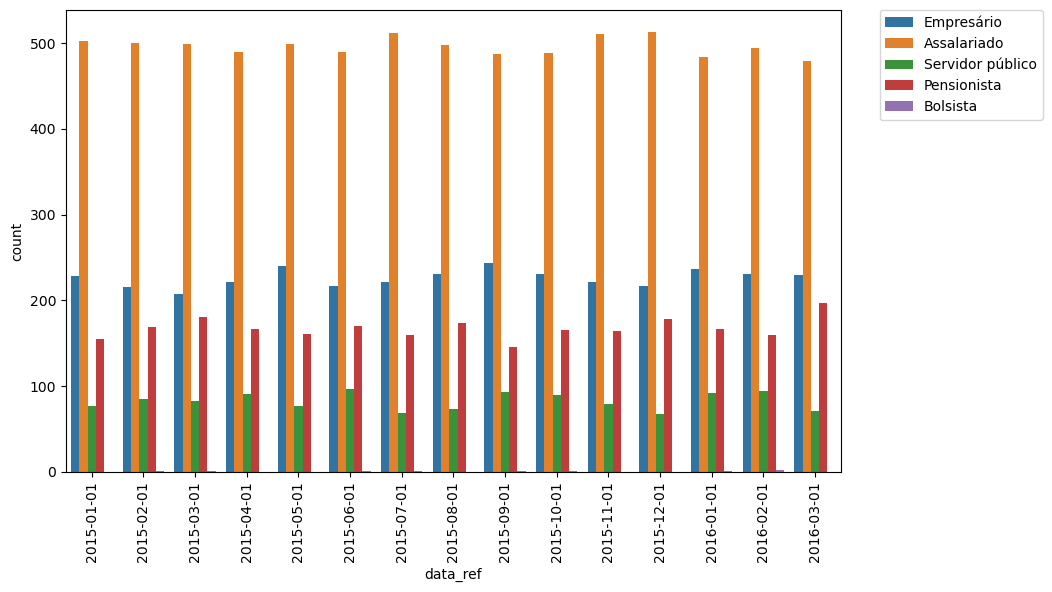

In [298]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=renda,
    x='data_ref',
    hue='tipo_renda'
)

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

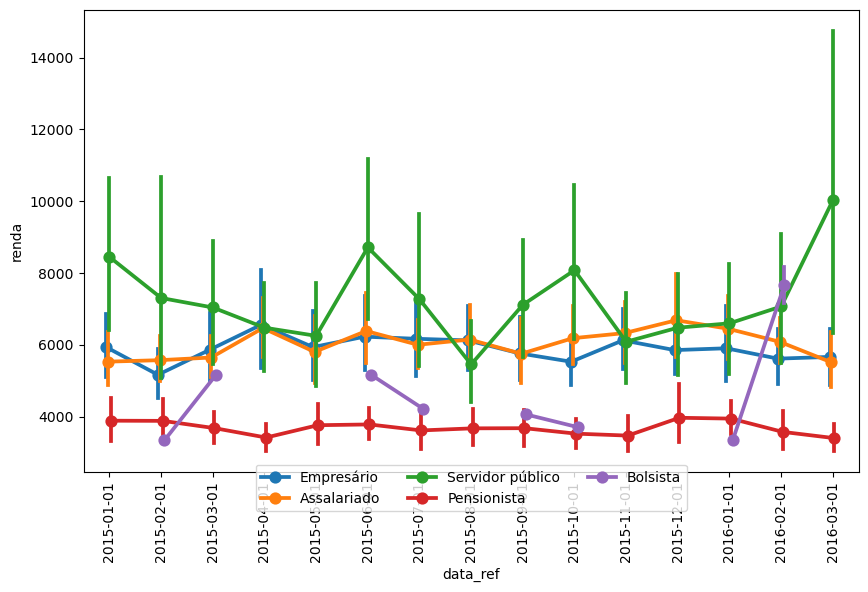

In [300]:
plt.figure(figsize=(10,6))
sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='tipo_renda',
    dodge=True,
    ci=95
)
plt.xticks(rotation=90)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)



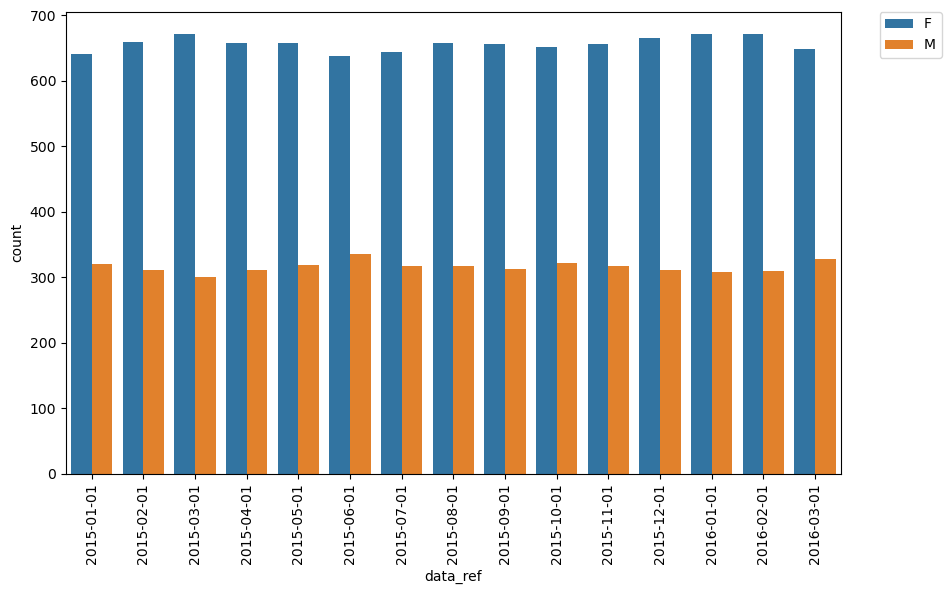

In [302]:
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='sexo'
)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

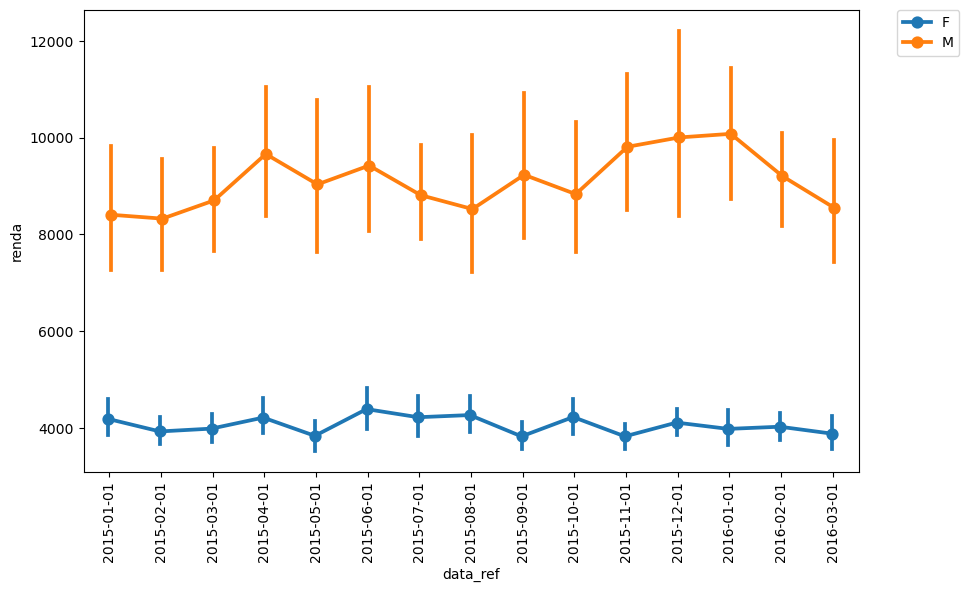

In [306]:
plt.figure(figsize=(10,6))
sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='sexo',
    dodge=True,
    ci=95
)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

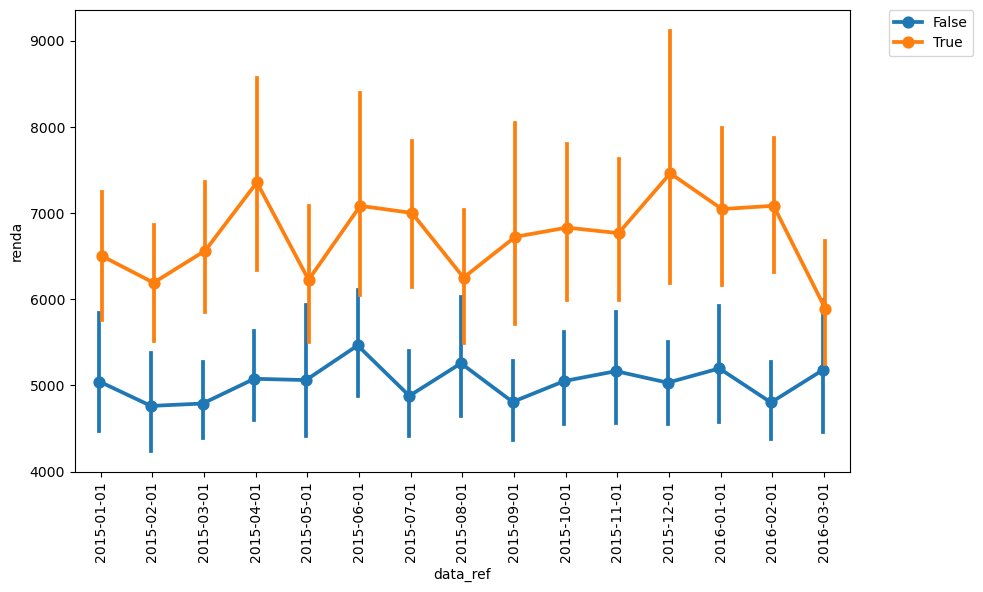

In [312]:
plt.figure(figsize=(10,6))
sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='posse_de_veiculo',
    dodge=True,
)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

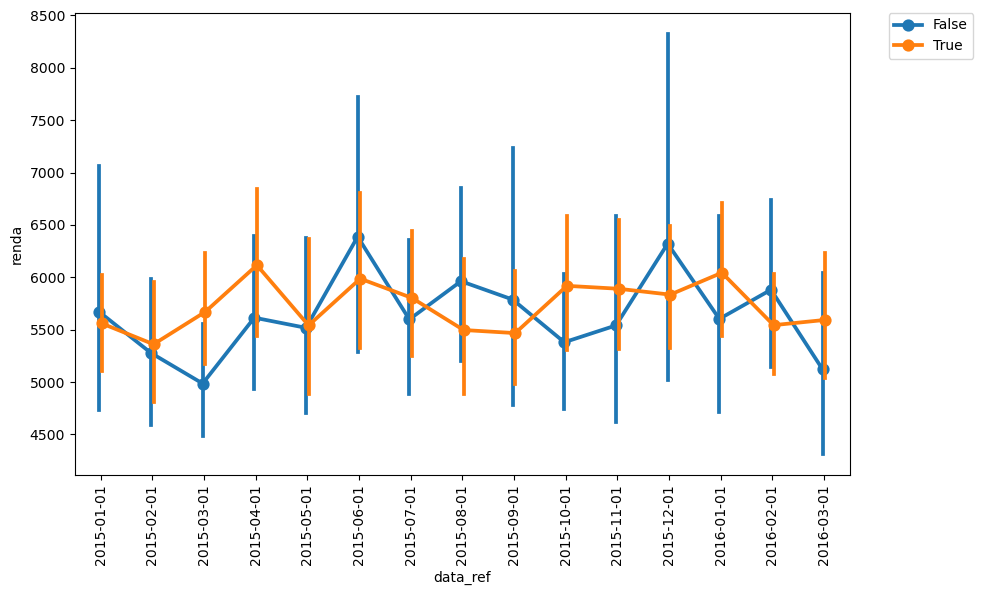

In [314]:
plt.figure(figsize=(10,6))
sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='posse_de_imovel',
    dodge=True,
)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

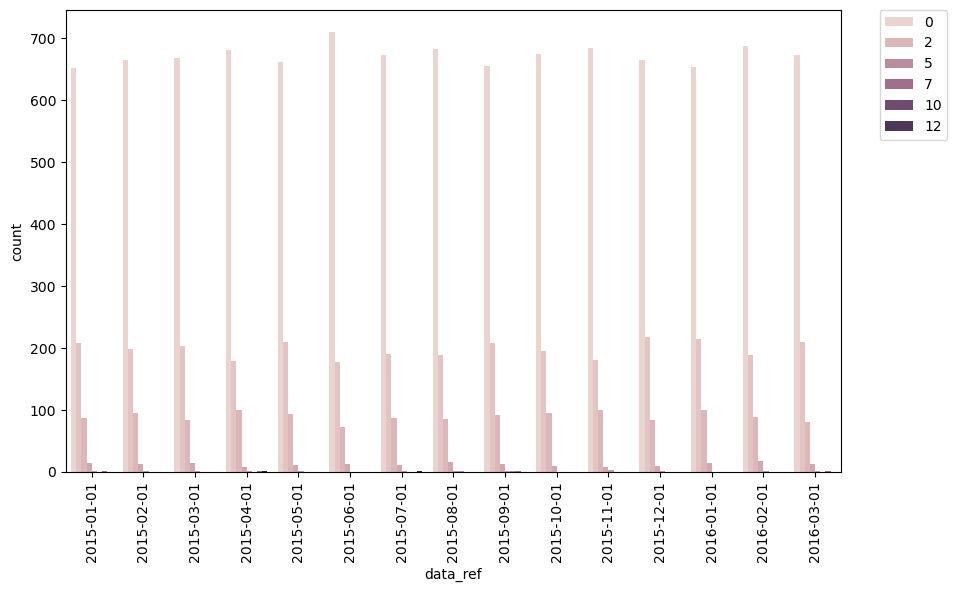

In [316]:
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='qtd_filhos'
)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [158]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [160]:
renda['tempo_emprego'].fillna(renda['tempo_emprego'].median(), inplace=True)

In [162]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          15000 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [172]:
renda = renda.drop_duplicates()
df_renda = renda.drop(columns=['data_ref', 'id_cliente']).reset_index(drop=True)
df_renda

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14588,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14589,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,6.013699,1.0,10093.45
14590,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14591,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [174]:
df_renda_dummies = pd.get_dummies(df_renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True).astype(int)
df_renda_dummies.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Pós graduação,educacao_Secundário,educacao_Superior completo,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,1,0,26,6,1,8060,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,1,1,0,28,7,2,1852,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,1,0,35,0,2,2253,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,1,1,30,4,3,6600,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,0,0,33,4,1,6475,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [208]:
def replace_outliers_with_std(renda):
    for col in renda.select_dtypes(include='number').columns:
        q1 = renda[col].quantile(0.25)
        q3 = renda[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identificar outliers
        outliers = (renda[col] < lower_bound) | (renda[col] > upper_bound)

        # Substituir outliers pelo desvio padrão da coluna
        renda.loc[outliers, col] = renda[col].std()

    return renda

renda_cleaned = replace_outliers_with_std(df_renda_dummies)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [210]:
y = renda_cleaned.loc[:, 'renda']
X = renda_cleaned.drop(columns='renda')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [212]:
reg = DecisionTreeRegressor()
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

regs = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=100).fit(X_train, y_train)
    regs.append(reg)

In [214]:
predict = reg.predict(X_train)
predict

array([4343.90050346, 4343.90050346, 4343.90050346, ..., 4343.90050346,
       4343.90050346, 4343.90050346])

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

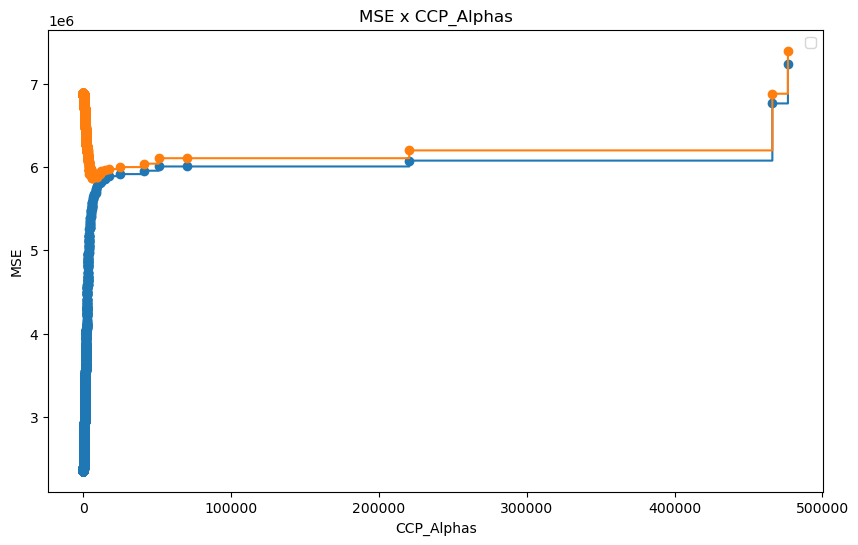

In [216]:
train_mse = [mean_squared_error(y_train, reg.predict(X_train)) for reg in regs]
test_mse = [mean_squared_error(y_test, reg.predict(X_test)) for reg in regs]

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1], train_mse[:-1], marker='o', drawstyle='steps-post')
plt.plot(ccp_alphas[:-1], test_mse[:-1], marker='o', drawstyle='steps-post')
plt.title('MSE x CCP_Alphas')
plt.xlabel('CCP_Alphas')
plt.ylabel('MSE')
plt.legend()
plt.plot()

In [224]:
result = pd.DataFrame({'alpha': ccp_alphas.tolist(), 'mse': train_mse})
result

,alpha,mse
0,0.000000e+00,2.353698e+06
1,0.000000e+00,2.353698e+06
2,2.723165e-12,2.353698e+06
3,2.723165e-12,2.353698e+06
4,2.723165e-12,2.353698e+06
...,...,...
3171,7.037089e+04,6.006122e+06
3172,2.204849e+05,6.076493e+06
3173,4.662096e+05,6.763188e+06
3174,4.767448e+05,7.239933e+06


In [234]:
r2 = regs[-20].score(X_train, y_train)
r2

0.31860144324567397

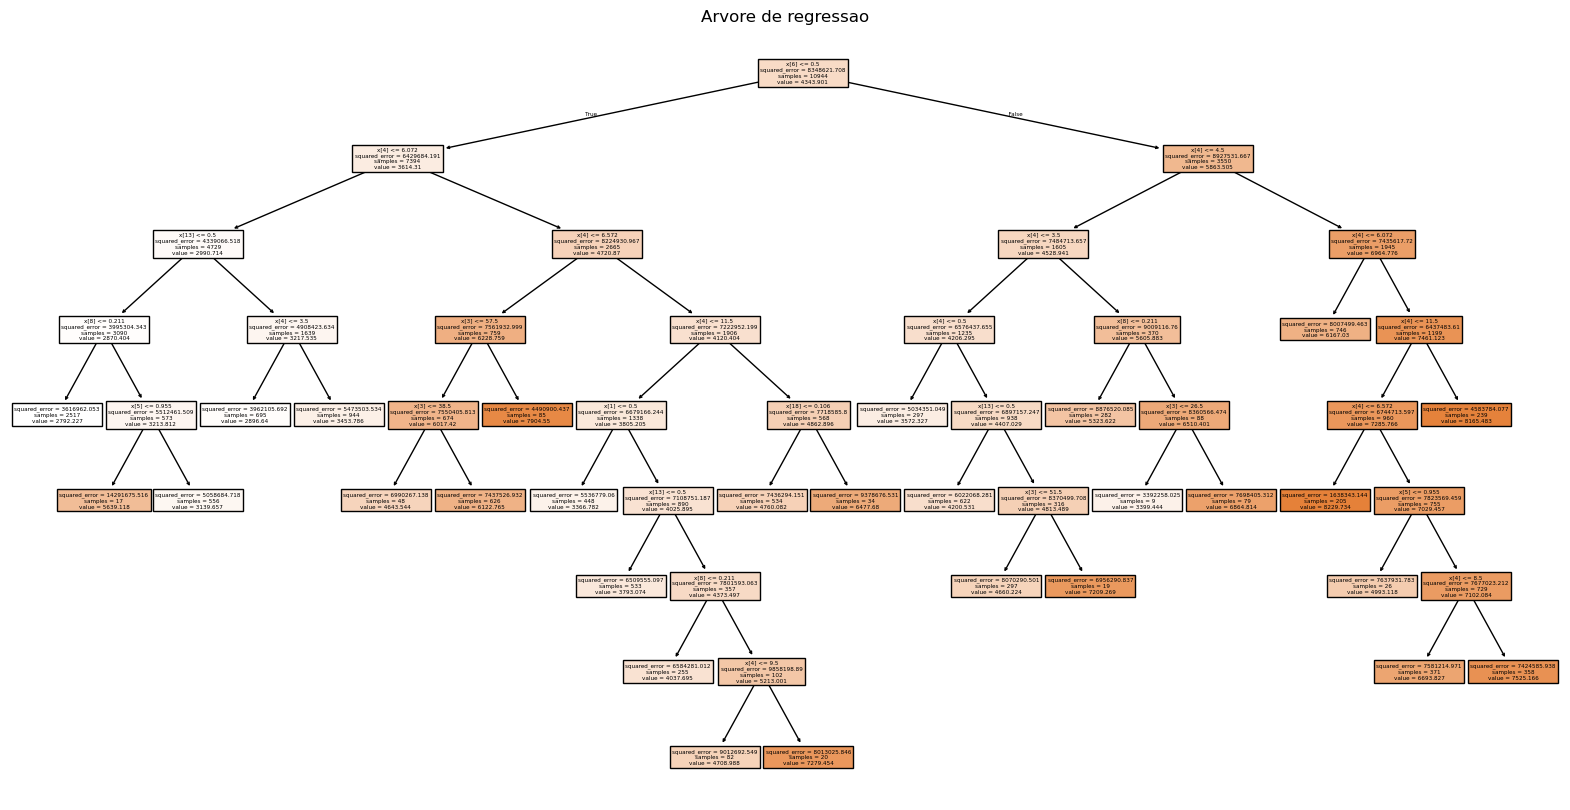

In [254]:
plt.figure(figsize=(20,10))
tree.plot_tree(regs[-20], filled=True)
plt.title('Arvore de regressao')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

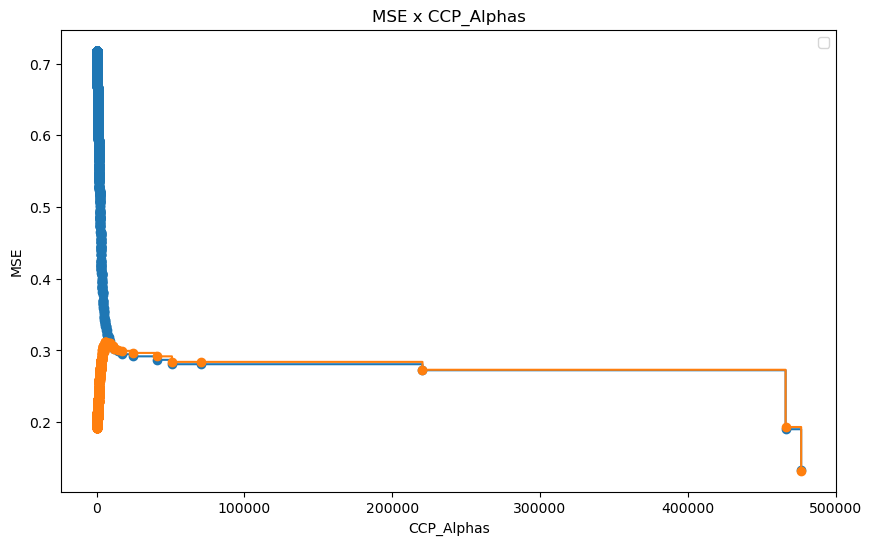

In [240]:
train_score = [reg.score(X_train, y_train) for reg in regs]
test_score = [reg.score(X_test, y_test) for reg in regs]

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1], train_score[:-1], marker='o', drawstyle='steps-post')
plt.plot(ccp_alphas[:-1], test_score[:-1], marker='o', drawstyle='steps-post')
plt.title('MSE x CCP_Alphas')
plt.xlabel('CCP_Alphas')
plt.ylabel('MSE')
plt.legend()
plt.plot()

In [262]:
pd.set_option('display.max_rows', None)
result = pd.DataFrame({'alpha': ccp_alphas.tolist(), 'score': test_score})
result.max()

alpha    1.108689e+06
score    3.121933e-01
dtype: float64

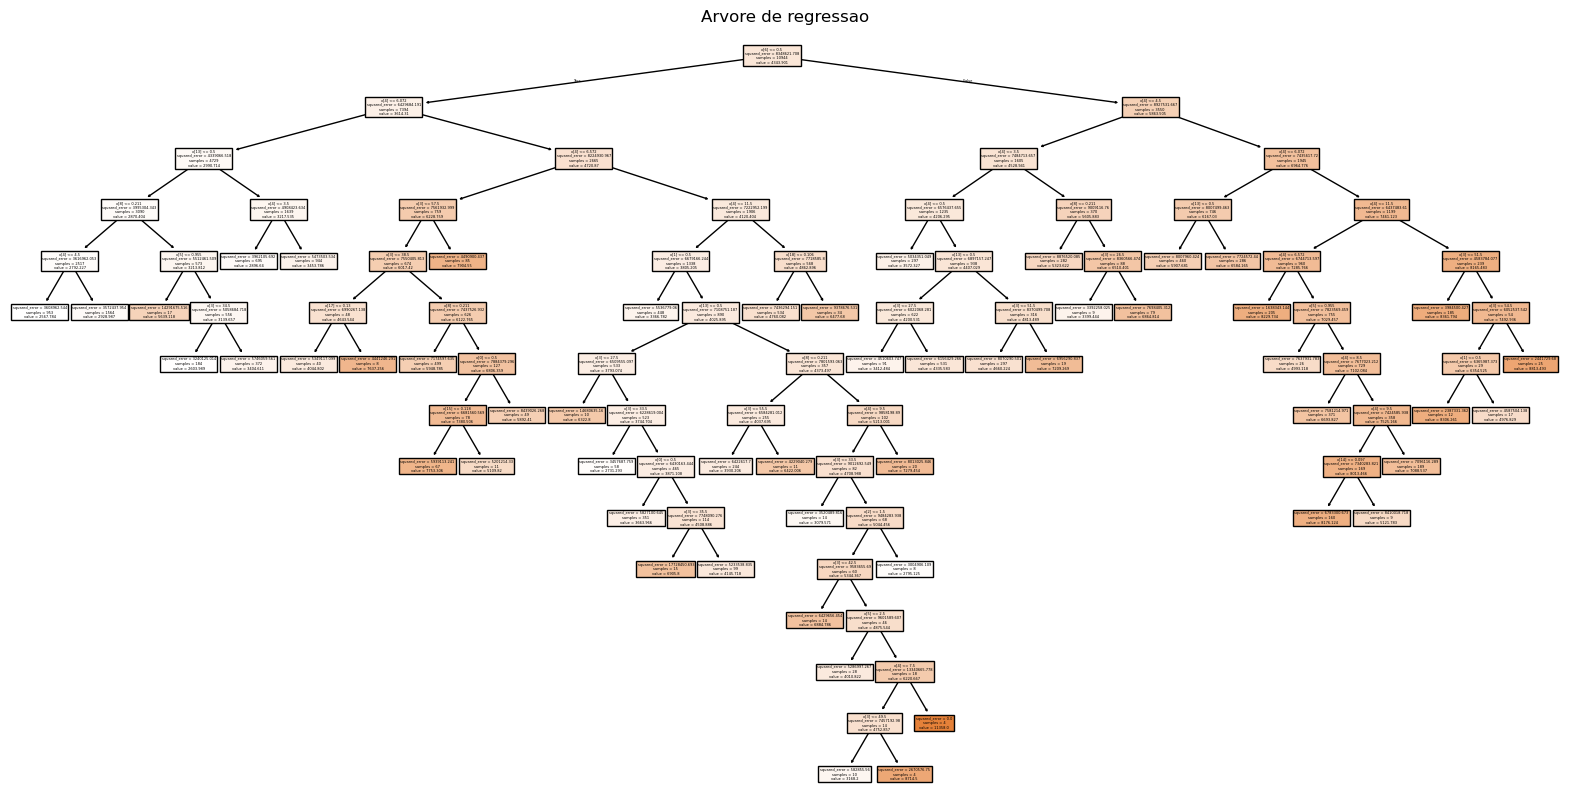

In [260]:
plt.figure(figsize=(20,10))
tree.plot_tree(regs[3142], filled=True)
plt.title('Arvore de regressao')
plt.show()

In [276]:
r2 = regs[3142].score(X_train, y_train)
r2

0.3373406492187567

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.